In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install haversine
from haversine import haversine

from google.colab import files
uploaded = files.upload()



Saving uber.csv to uber (1).csv


In [ ]:
df=pd.read_csv("uber.csv")
df

In [ ]:
print(df.head())

   Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647                1  
3         

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB
None


In [ ]:
print(df.columns)

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')


In [ ]:
df=df.drop(['Unnamed: 0','key'],axis=1)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [ ]:
print(df.shape)

(200000, 7)


In [ ]:
print(df.dtypes)

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object


In [ ]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [ ]:
print("Missing values before filling:\n", df.isnull().sum())

Missing values before filling:
 fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


In [ ]:
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace=True)

<ipython-input-24-5cc6a08320df>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace=True)


In [ ]:
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].median(),inplace=True)

<ipython-input-25-dd342b9caf9f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].median(),inplace=True)


In [ ]:
print("Missing values after filling:\n", df.isnull().sum())

Missing values after filling:
 fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [ ]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'],errors="coerce")

In [ ]:
df=df.assign(
        hour=df.pickup_datetime.dt.hour,
        day=df.pickup_datetime.dt.day,
        month=df.pickup_datetime.dt.month,
        year=df.pickup_datetime.dt.year,
        dayofweek=df.pickup_datetime.dt.dayofweek
)

In [ ]:
df=df.drop('pickup_datetime',axis=1)

KeyError: "['pickup_datetime'] not found in axis"

,0
fare_amount,"Axes(0.125,0.786098;0.352273x0.0939024)"
pickup_longitude,"Axes(0.547727,0.786098;0.352273x0.0939024)"
pickup_latitude,"Axes(0.125,0.673415;0.352273x0.0939024)"
dropoff_longitude,"Axes(0.547727,0.673415;0.352273x0.0939024)"
dropoff_latitude,"Axes(0.125,0.560732;0.352273x0.0939024)"
passenger_count,"Axes(0.547727,0.560732;0.352273x0.0939024)"
hour,"Axes(0.125,0.448049;0.352273x0.0939024)"
day,"Axes(0.547727,0.448049;0.352273x0.0939024)"
month,"Axes(0.125,0.335366;0.352273x0.0939024)"
year,"Axes(0.547727,0.335366;0.352273x0.0939024)"


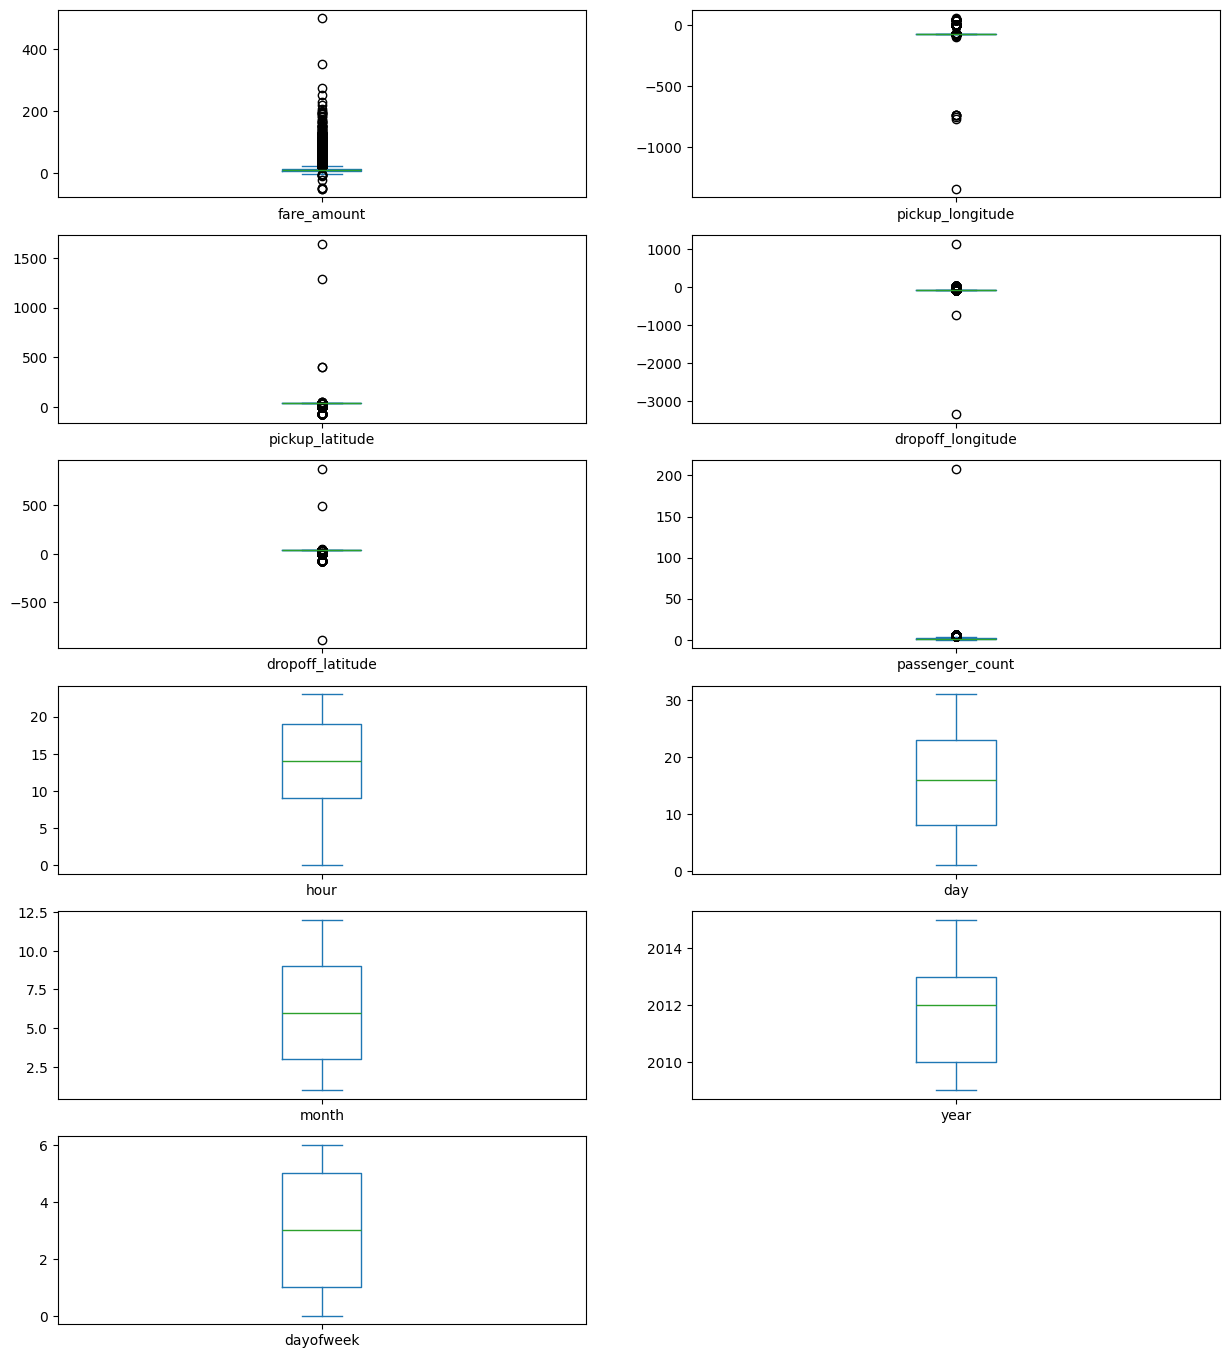

In [ ]:
#outliers
df.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20))

In [ ]:
def remove_outlier(df1,col):
    Q1=df1[col].quantile(0.25)
    Q3=df1[col].quantile(0.75)
    IQR=Q3-Q1
    lower_whisker=Q1-1.5*IQR
    upper_whisker=Q3+1.5*IQR
    df1[col]=np.clip(df1[col],lower_whisker,upper_whisker)
    return df1


In [ ]:
def treat_all_outliers(df1,col_list):
    for c in col_list:
        df1=remove_outlier(df1,c)
    return df1

In [ ]:
df=treat_all_outliers(df,df.columns)

In [ ]:
#calculate distance
travel_dist=[]
for pos in range(len(df['pickup_longitude'])):
    loc1=(df['pickup_latitude'][pos],df['pickup_longitude'][pos])
    loc2=(df['dropoff_latitude'][pos],df['dropoff_longitude'][pos])
    c=haversine(loc1,loc2)
    travel_dist.append(c)

df['dist_travel_km']=travel_dist

In [ ]:
df=df[(df['dist_travel_km']<=130)&(df['dist_travel_km']>1)]
print("Remaining observations in dataset:",df.shape)

Remaining observations in dataset: (163040, 12)


In [ ]:
incorrect_coordinates=df.loc[
    (df['pickup_latitude']>90) | (df['pickup_latitude']<-90)|
    (df['pickup_longitude']>180) |(df['pickup_longitude']<-180)|
    (df['dropoff_latitude']>90) | (df['dropoff_latitude']<-90)|
    (df['dropoff_longitude']>180) | (df['dropoff_longitude']<-180)
]

df.drop(incorrect_coordinates.index,inplace=True,errors='ignore')

<ipython-input-38-7ef9571bbefe>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(incorrect_coordinates.index,inplace=True,errors='ignore')


<Axes: >

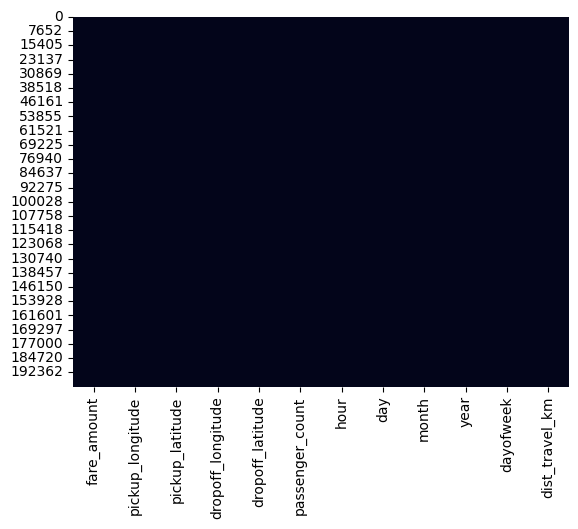

In [ ]:
#heatmap for missing values
sns.heatmap(df.isnull(),cbar=False)

In [ ]:
corr=df.corr()
print("Correlation matrix:\n",corr)

Correlation matrix:
                    fare_amount  pickup_longitude  pickup_latitude  \
fare_amount           1.000000          0.193177        -0.119469   
pickup_longitude      0.193177          1.000000         0.425309   
pickup_latitude      -0.119469          0.425309         1.000000   
dropoff_longitude     0.258583          0.241569         0.148761   
dropoff_latitude     -0.137745          0.169203         0.358836   
passenger_count       0.015056         -0.012892        -0.016186   
hour                 -0.029760          0.013057         0.031484   
day                   0.001607         -0.004459         0.002907   
month                 0.031339          0.000863         0.001627   
year                  0.161861          0.014862        -0.016172   
dayofweek             0.009264         -0.028392        -0.044618   
dist_travel_km        0.798926          0.130003        -0.143530   

                   dropoff_longitude  dropoff_latitude  passenger_count  \
fare_a

<Axes: >

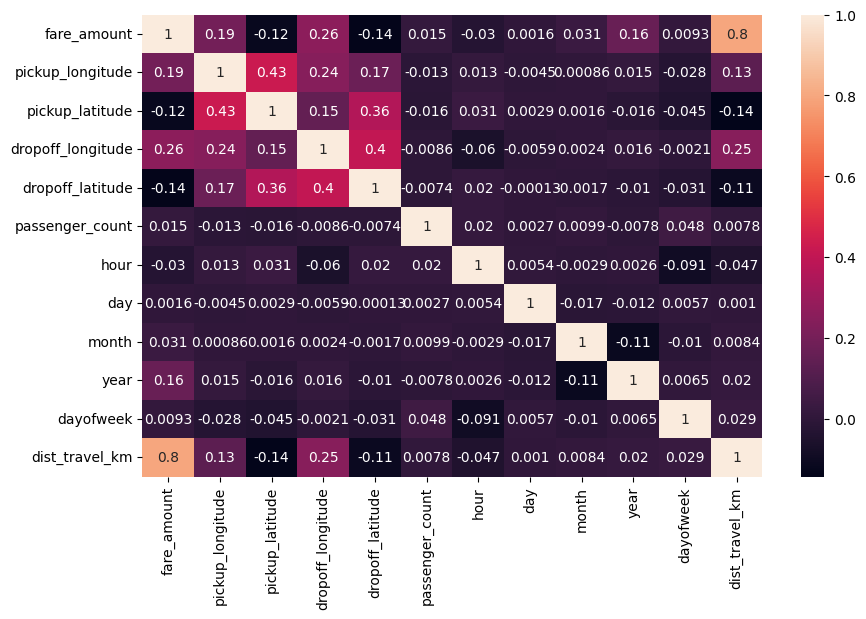

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

In [ ]:
X=df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude','dist_travel_km']]
y=df['fare_amount']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)
#LR
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,y_train)
print("Linear Intercept :",regression.intercept_)
print("Linear Coeeficients:",regression.coef_)
y_pred_lr=regression.predict(X_test)
print("Linear Regression Predictions:",y_pred_lr[ :5])


Linear Intercept : 4852.913200737887
Linear Coeeficients: [ 29.03329269  -7.6452543   21.93667159 -18.78784702   1.80656922]
Linear Regression Predictions: [ 8.6378828   9.05753642 11.37711627  9.75527075 12.97205352]


In [ ]:
#metrics evaluation for LR
from sklearn.metrics import r2_score,mean_squared_error
r2_lr=r2_score(y_test,y_pred_lr)
mse_lr=mean_squared_error(y_test,y_pred_lr)
rmse_lr=np.sqrt(mse_lr)
print("r2 : ",r2_lr)
print("mse : ",mse_lr)
print("rmse : ",rmse_lr)


r2 :  0.6547900811358368
mse :  9.897831981258658
rmse :  3.1460820048528073


In [ ]:
#rf
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)


In [ ]:
#metrics evaluation for rf
r2_rf=r2_score(y_test,y_pred_rf)
mse_rf=mean_squared_error(y_test,y_pred_rf)
rmse_rf=np.sqrt(mse_rf)
print("r2 : ",r2_rf)
print("mse : ",mse_rf)
print("rmse : ",rmse_rf)


r2 :  0.7843603969145055
mse :  6.182801950964168
rmse :  2.4865240700552587
